# Jon Williamson

## Preprocessing




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [2]:
df = pd.read_csv('svd_imputed_master_data.csv', index_col=0)
#df.fillna(0, inplace=True)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.410947,-1
1,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0,0.267857,1
2,Adam Gase,2016,38,0,0,0,0,5,3,0,...,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0,0.500000,1
3,Adam Gase,2019,41,1,0,0,0,5,3,3,...,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0,0.281250,0
4,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0,0.745455,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because no coach has ever been  an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 9-140 and 142-150 were normalized using a z-score transformation vs. all teams in the league in that year. This normalization  roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

In [4]:
df = df[df['Coach Tenure Class'] != -1]
# Get the target variable: Average 2-Year Win Percentage
X = df.iloc[:,2:-2]
y = df['Avg 2Y Win Pct']  # Changed from Coach Tenure Class to Avg 2Y Win Pct
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,47,0,0,0,0,12,0,0,0.438842,0.417777,...,0.428571,-0.956368,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.000000
2,38,0,0,0,0,5,3,0,1.532619,1.348807,...,0.437500,-0.268496,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.000000
3,41,1,0,0,0,5,3,3,1.532619,1.348807,...,0.281250,-0.656092,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.000000
4,44,0,8,0,12,0,0,0,0.481277,0.481733,...,0.400000,0.116123,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.000000
5,25,0,0,0,0,0,0,0,0.418365,0.518853,...,0.375848,-0.430732,0.206445,-0.098774,0.128207,-0.372318,0.232741,-0.182801,0.195872,0.252686


In [5]:
y.head(5)

Unnamed: 0
1    0.267857
2    0.500000
3    0.281250
4    0.745455
5    0.200000
Name: Avg 2Y Win Pct, dtype: float64

The `Avg 2Y Win Pct` represents the average winning percentage over the coach's first two years with a team. This is a continuous variable ranging from 0.0 to 1.0.

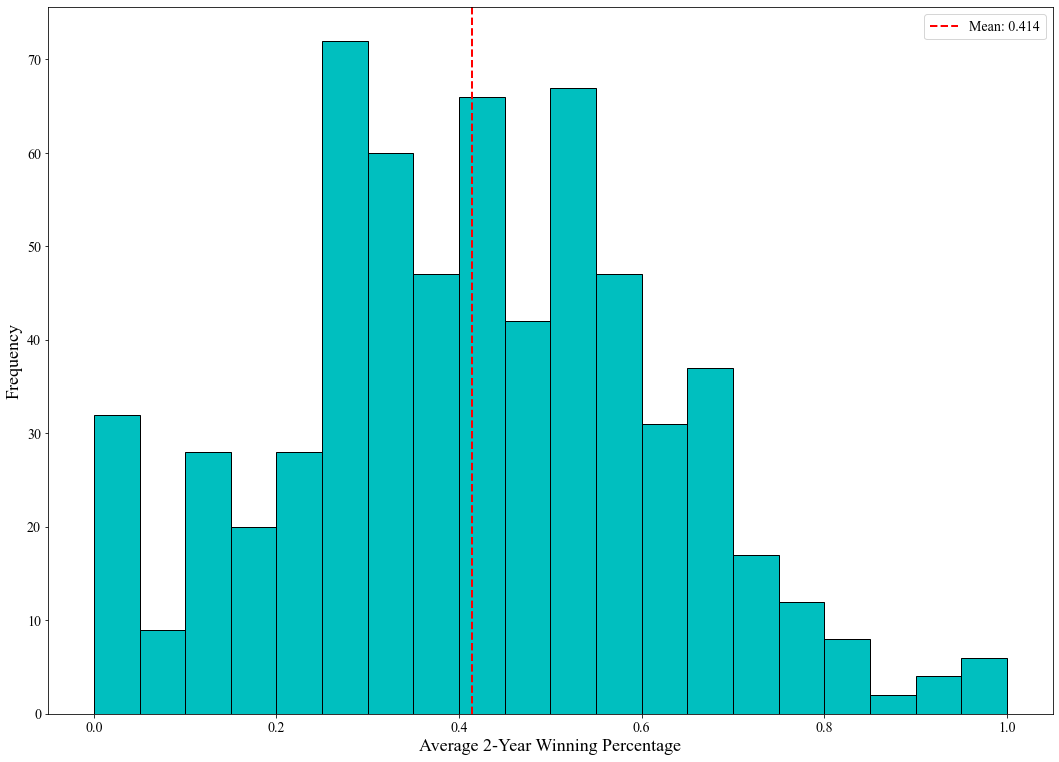

In [6]:
# Visualize the distribution of average 2-year winning percentage
raw_win_pct = y.values.T
raw_win_pct_mean = np.mean(raw_win_pct)
plt.hist(raw_win_pct, bins=20, color='c', edgecolor='k')
plt.axvline(raw_win_pct_mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {raw_win_pct_mean:.3f}')
plt.xlabel('Average 2-Year Winning Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The white boxes in the matrix show that that offensive and defensive coordinator metrics have no correlation. This is expected, as no coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features.

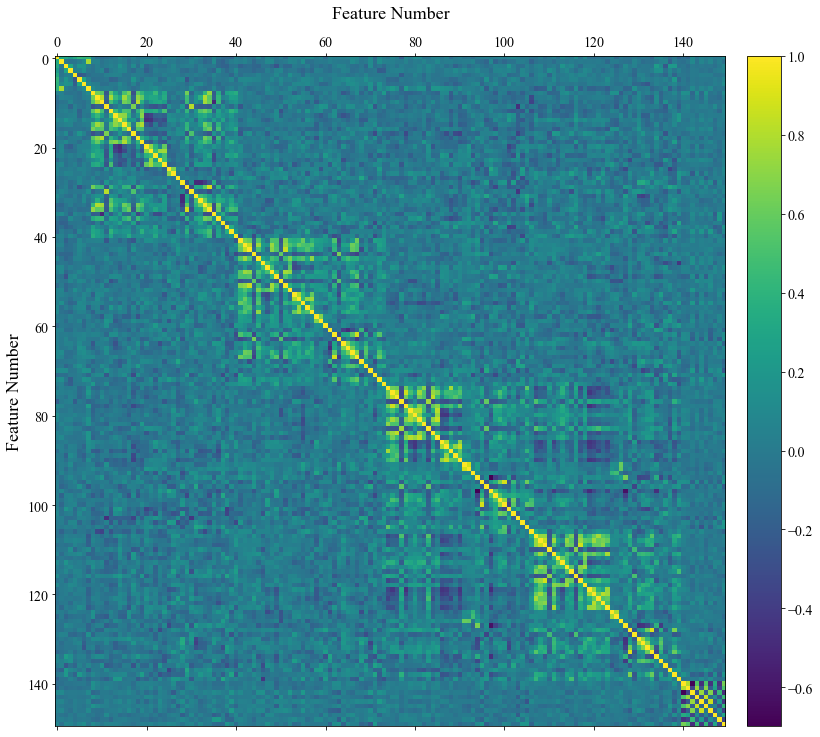

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
#plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
#plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-720)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing using coach-level split to prevent data leakage:

In [8]:
# Coach-level train/test split to prevent data leakage
# For regression, we use coach-level split but without stratification (since target is continuous)

def coach_level_split_regression(df, X, y, test_size=0.2, random_state=42):
    """Coach-level split for regression - prevents data leakage but no stratification needed."""
    np.random.seed(random_state)
    
    # Get unique coaches and shuffle them
    unique_coaches = df['Coach Name'].unique()
    np.random.shuffle(unique_coaches)
    
    # Count instances per coach
    coach_counts = df['Coach Name'].value_counts()
    
    # Try to maintain roughly the desired test_size
    test_coaches = []
    test_instances = 0
    total_instances = len(df)
    target_test_instances = int(total_instances * test_size)
    
    for coach in unique_coaches:
        if test_instances < target_test_instances:
            test_coaches.append(coach)
            test_instances += coach_counts[coach]
        else:
            break
    
    # Create train/test masks
    test_mask = df['Coach Name'].isin(test_coaches)
    train_mask = ~test_mask
    
    X_train = X[train_mask]
    X_test = X[test_mask]
    y_train = y[train_mask]
    y_test = y[test_mask]
    
    return X_train, X_test, y_train, y_test, test_coaches

# Apply coach-level split
X_train, X_test, y_train, y_test, test_coaches = coach_level_split_regression(df, X, y, test_size=0.20, random_state=42)

print(f"Train set: {len(X_train)} instances from {df.loc[X_train.index, 'Coach Name'].nunique()} coaches")
print(f"Test set: {len(X_test)} instances from {len(test_coaches)} coaches")

# Verify no overlap
train_coaches_set = set(df.loc[X_train.index, 'Coach Name'])
test_coaches_set = set(df.loc[X_test.index, 'Coach Name'])
overlap = train_coaches_set & test_coaches_set
print(f"Coach overlap between train and test: {len(overlap)} (should be 0)")

# Show target distribution
print(f"\nTrain set win % statistics:")
print(f"  Mean: {y_train.mean():.3f}")
print(f"  Std:  {y_train.std():.3f}")
print(f"  Range: {y_train.min():.3f} - {y_train.max():.3f}")

print(f"\nTest set win % statistics:")
print(f"  Mean: {y_test.mean():.3f}")
print(f"  Std:  {y_test.std():.3f}")
print(f"  Range: {y_test.min():.3f} - {y_test.max():.3f}")

print(f"\nOriginal data statistics:")
print(f"  Mean: {y.mean():.3f}")
print(f"  Std:  {y.std():.3f}")
print(f"  Range: {y.min():.3f} - {y.max():.3f}")

Train set: 508 instances from 357 coaches
Test set: 127 instances from 94 coaches
Coach overlap between train and test: 0 (should be 0)

Train set win % statistics:
  Mean: 0.412
  Std:  0.205
  Range: 0.000 - 1.000

Test set win % statistics:
  Mean: 0.421
  Std:  0.210
  Range: 0.000 - 1.000

Original data statistics:
  Mean: 0.414
  Std:  0.206
  Range: 0.000 - 1.000


In [9]:
# Cell removed - duplicate of cell 14

In [10]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Model: XGBoost Regressor

Necessary Imports:

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

We will implement the XGBoost Regressor with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [13]:
# Expanded hyperparameter distributions for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Use distributions instead of lists for better coverage
xgbr_param_distributions = {
    "n_estimators":     [25, 50, 100, 200],        # Discrete choices
    "learning_rate":    [.05, .1, .15, .2, .25, .3, .35],  # More granular
    "max_depth":        [2, 3, 4, 5],              # Extended range
    "gamma":            [0, .01, .05, .1],         # More regularization options
    "reg_lambda":       [0, .01, .1, .5],          # L2 regularization
    "reg_alpha":        [0, .01, .1],              # L1 regularization (new)
    "subsample":        [0.8, 0.85, 0.9, 0.95, 1.0],  # Row sampling (new)
    "colsample_bytree": [0.8, 0.85, 0.9, 0.95, 1.0],  # Feature sampling (new)
    "min_child_weight": [1, 2, 3, 4, 5]           # Leaf node requirements (new)
}

# Calculate theoretical maximum combinations
total_combinations = 1
for param, values in xgbr_param_distributions.items():
    total_combinations *= len(values)

n_iter = 800  # Test 800 random combinations (fewer than classification due to regression)
print(f"RandomizedSearchCV with {n_iter:,} iterations")
print(f"From {total_combinations:,} possible combinations ({n_iter/total_combinations*100:.1f}% coverage)")
print("New parameters added for regression:")
print("  - reg_alpha: L1 regularization for feature selection")
print("  - subsample: Row sampling to reduce overfitting") 
print("  - colsample_bytree: Feature sampling per tree")
print("  - min_child_weight: Minimum samples required in leaf nodes")
print("  - Extended learning_rate and max_depth ranges")

xgbr_best_params_dict = {key: [] for key in xgbr_param_distributions.keys()}

xgbr_result_dict = {    
    'train_rmse':   [],
    'test_rmse':    [],
    'train_r2':     [],
    'test_r2':      [],
    'train_mae':    [],
    'test_mae':     [],
    'importance':   []
}

# Test GPU availability for regression
print("\nTesting GPU availability for XGBoost Regression...")
gpu_available = False

try:
    # Test GPU with a small dataset and proper parameters
    test_X = X_train.iloc[:50].values  # Small test set
    test_y = y_train.iloc[:50].values
    
    # GPU parameters for regression
    gpu_test_params = {
        'objective': 'reg:squarederror',
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        'n_estimators': 5,
        'verbosity': 0,
        'random_state': 42
    }
    
    test_model = XGBRegressor(**gpu_test_params)
    test_model.fit(test_X, test_y)
    
    # If we get here, GPU works
    gpu_available = True
    print("GPU acceleration available for regression!")
    
    # Set GPU parameters
    default_xgbr_params = {
        'verbosity': 1,
        'objective': 'reg:squarederror',
        'n_jobs': -1,
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        'predictor': 'gpu_predictor',
        'max_bin': 256,
        'random_state': 42
    }
    
    print("   Using GPU for tree construction (gpu_hist)")
    print("   Expected 3-8x speedup over CPU")
    
except Exception as e:
    print(f"GPU not available: {str(e)[:50]}...")
    print("   Using optimized CPU configuration instead")
    
    # Optimized CPU parameters
    default_xgbr_params = {
        'verbosity': 1,
        'objective': 'reg:squarederror',
        'n_jobs': -1,
        'tree_method': 'hist',  # Fastest CPU method
        'max_bin': 256,
        'random_state': 42
    }

num_of_folds = 5  # Reduced for faster execution

# Coach-level cross-validation for regression
def coach_level_cv_split_regression(df_train, X_train, y_train, n_splits=5):
    """Generate coach-level CV splits for regression."""
    np.random.seed(42)  # For reproducibility
    
    # Get unique coaches and shuffle them
    unique_coaches = df_train['Coach Name'].unique()
    np.random.shuffle(unique_coaches)
    
    # Create folds
    splits = []
    coaches_per_fold = len(unique_coaches) // n_splits
    
    for fold_idx in range(n_splits):
        start_idx = fold_idx * coaches_per_fold
        if fold_idx == n_splits - 1:  # Last fold gets remaining coaches
            end_idx = len(unique_coaches)
        else:
            end_idx = start_idx + coaches_per_fold
        
        test_coaches_fold = unique_coaches[start_idx:end_idx]
        
        if len(test_coaches_fold) == 0:
            continue
            
        # Create masks
        test_mask = df_train['Coach Name'].isin(test_coaches_fold)
        train_mask = ~test_mask
        
        # Get indices that exist in X_train
        train_indices = []
        test_indices = []
        
        for idx in X_train.index:
            if train_mask[idx]:
                train_indices.append(X_train.index.get_loc(idx))
            elif test_mask[idx]:
                test_indices.append(X_train.index.get_loc(idx))
        
        # Only add split if both train and test have data
        if len(train_indices) > 0 and len(test_indices) > 0:
            splits.append((np.array(train_indices), np.array(test_indices)))
    
    return splits

# Get the dataframe subset for training data
df_train = df.loc[X_train.index]

# Generate coach-level CV splits
cv_splits = coach_level_cv_split_regression(df_train, X_train, y_train, n_splits=num_of_folds)

print(f"\nRunning {len(cv_splits)}-fold coach-level cross-validation...")
print(f"Each fold ensures:")
print(f"  - No coach appears in both train and validation sets")
print(f"  - Prevents data leakage from coach-specific patterns")
print(f"\nUsing RandomizedSearchCV for much faster execution!")

# Estimate time based on acceleration
if gpu_available:
    estimated_minutes = n_iter * len(cv_splits) / 400  # GPU: ~6x faster estimate
    print(f"Estimated time with GPU: ~{estimated_minutes:.0f} minutes")
else:
    estimated_minutes = n_iter * len(cv_splits) / 80   # CPU optimized: ~2x faster
    print(f"Estimated time with optimized CPU: ~{estimated_minutes:.0f} minutes")

print()

for fold_idx, (train_index, test_index) in enumerate(cv_splits):
    print(f"Fold {fold_idx + 1}/{len(cv_splits)} - Testing {n_iter:,} random parameter combinations...")
    
    X_train_ = X_train.iloc[train_index]
    X_test_ = X_train.iloc[test_index]
    y_train_ = y_train.iloc[train_index].values.ravel()
    y_test_ = y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__ = mean_imputer.fit_transform(X_train_)
    X_test__ = mean_imputer.transform(X_test_)

    # Use RandomizedSearchCV for much faster hyperparameter search
    model = RandomizedSearchCV(
        XGBRegressor(**default_xgbr_params), 
        param_distributions=xgbr_param_distributions,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',  # Regression scoring
        n_jobs=1 if gpu_available else -1,  # Single job for GPU, multi for CPU
        cv=3,  # Internal CV for RandomizedSearchCV (faster than 5)
        verbose=1,
        random_state=42
    ).fit(X_train__, y_train_)
    
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    # Get predictions
    tr_pred = best_model.predict(X_train__)
    te_pred = best_model.predict(X_test__)

    # Calculate regression metrics
    xgbr_result_dict['train_rmse'].append(np.sqrt(mean_squared_error(y_train_, tr_pred)))
    xgbr_result_dict['test_rmse'].append(np.sqrt(mean_squared_error(y_test_, te_pred)))
    xgbr_result_dict['train_r2'].append(r2_score(y_train_, tr_pred))
    xgbr_result_dict['test_r2'].append(r2_score(y_test_, te_pred))
    xgbr_result_dict['train_mae'].append(mean_absolute_error(y_train_, tr_pred))
    xgbr_result_dict['test_mae'].append(mean_absolute_error(y_test_, te_pred))
    
    print(f"  Fold {fold_idx + 1} complete - Test RMSE: {xgbr_result_dict['test_rmse'][-1]:.4f}, Test R²: {xgbr_result_dict['test_r2'][-1]:.4f}")
    print(f"  Best params: {model.best_params_}")

print("\nCoach-level cross-validation with RandomizedSearchCV complete!")
if gpu_available:
    print("GPU acceleration used successfully!")
else:
    print("Optimized CPU configuration provided maximum performance!")

RandomizedSearchCV with 800 iterations
From 672,000 possible combinations (0.1% coverage)
New parameters added for regression:
  - reg_alpha: L1 regularization for feature selection
  - subsample: Row sampling to reduce overfitting
  - colsample_bytree: Feature sampling per tree
  - min_child_weight: Minimum samples required in leaf nodes
  - Extended learning_rate and max_depth ranges

Testing GPU availability for XGBoost Regression...
GPU not available: [11:40:01] c:\b\abs_7diruzi3as\croot\xgboost-split...
   Using optimized CPU configuration instead

Running 5-fold coach-level cross-validation...
Each fold ensures:
  - No coach appears in both train and validation sets
  - Prevents data leakage from coach-specific patterns

Using RandomizedSearchCV for much faster execution!
Estimated time with optimized CPU: ~50 minutes

Fold 1/5 - Testing 800 random parameter combinations...
Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.2min finished


  Fold 1 complete - Test RMSE: 0.1096, Test R²: 0.6879
  Best params: {'subsample': 0.9, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
Fold 2/5 - Testing 800 random parameter combinations...
Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 1314 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.1min finished


  Fold 2 complete - Test RMSE: 0.1109, Test R²: 0.7201
  Best params: {'subsample': 0.95, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.85}
Fold 3/5 - Testing 800 random parameter combinations...
Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 1314 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


  Fold 3 complete - Test RMSE: 0.1057, Test R²: 0.6877
  Best params: {'subsample': 0.9, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.85}
Fold 4/5 - Testing 800 random parameter combinations...
Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.0min finished


  Fold 4 complete - Test RMSE: 0.1180, Test R²: 0.6997
  Best params: {'subsample': 0.95, 'reg_lambda': 0, 'reg_alpha': 0.01, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.95}
Fold 5/5 - Testing 800 random parameter combinations...
Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:   49.5s


  Fold 5 complete - Test RMSE: 0.1073, Test R²: 0.7297
  Best params: {'subsample': 0.85, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}

Coach-level cross-validation with RandomizedSearchCV complete!
Optimized CPU configuration provided maximum performance!


[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.1min finished


In [14]:
print('Cross-Validation Results:')
print('=' * 50)
print('Average Train RMSE: {:.4f}'.format(np.mean(xgbr_result_dict['train_rmse'])))
print('Average Test RMSE:  {:.4f}'.format(np.mean(xgbr_result_dict['test_rmse'])))
print('Average Train MAE:  {:.4f}'.format(np.mean(xgbr_result_dict['train_mae'])))
print('Average Test MAE:   {:.4f}'.format(np.mean(xgbr_result_dict['test_mae'])))
print('Average Train R²:   {:.4f}'.format(np.mean(xgbr_result_dict['train_r2'])))
print('Average Test R²:    {:.4f}'.format(np.mean(xgbr_result_dict['test_r2'])))

Cross-Validation Results:
Average Train RMSE: 0.0206
Average Test RMSE:  0.1103
Average Train MAE:  0.0163
Average Test MAE:   0.0806
Average Train R²:   0.9888
Average Test R²:    0.7050


In [15]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
        count += 1
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Feature 84, has an avg. importance of 0.0665 with a std. dev. of 0.0162.
Rank  2: Feature 18, has an avg. importance of 0.0663 with a std. dev. of 0.0234.
Rank  3: Feature 28, has an avg. importance of 0.0547 with a std. dev. of 0.0168.
Rank  4: Feature 121, has an avg. importance of 0.0485 with a std. dev. of 0.0179.
Rank  5: Feature 38, has an avg. importance of 0.0366 with a std. dev. of 0.0244.
Rank  6: Feature 73, has an avg. importance of 0.0340 with a std. dev. of 0.0118.
Rank  7: Feature 59, has an avg. importance of 0.0262 with a std. dev. of 0.0092.
Rank  8: Feature 72, has an avg. importance of 0.0243 with a std. dev. of 0.0087.
Rank  9: Feature 50, has an avg. importance of 0.0233 with a std. dev. of 0.0152.
Rank 10: Feature 98, has an avg. importance of 0.0230 with a std. dev. of 0.0119.
Rank 11: Feature 61, has an avg. importance of 0.0228 with a std. dev. of 0.0138.
Rank 12: Feature 147, has an avg. importance of 0.0217 with a std. dev. of 0.0176.
Rank 13: Featu

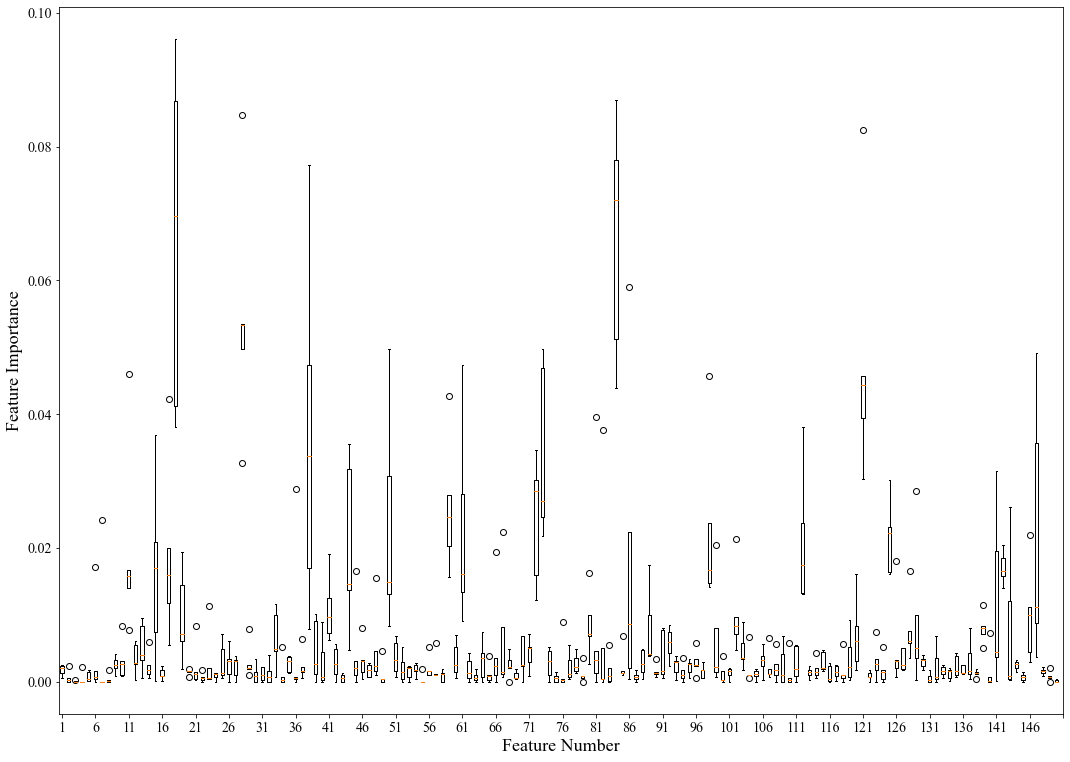

In [16]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = [item.split()[-1] for item in X.columns.values]
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=xgbr_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

The results show the feature importance from the XGBoost Regressor model. We can now evaluate the model's final performance on the hold-out test set.

The previously printed metrics show the performance of the XGBoost Regressor model. The R² value indicates how well the model explains the variance in the data, while RMSE and MAE show the average prediction errors. Before moving on, let's visualize the predictions of a model with the best average parameters on the held-out test set.

In [17]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    print('Best parameters from cross-validation:')
    print(test_xgbr_best_params_dict)
    xgbr = XGBRegressor(**test_xgbr_best_params_dict).fit(X_train, y_train)
    plot_pred = xgbr.predict(X_test)

Best parameters from cross-validation:
{'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 2, 'gamma': 0, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.85, 'min_child_weight': 3, 'verbosity': 1, 'objective': 'reg:squarederror', 'n_jobs': -1, 'tree_method': 'hist', 'max_bin': 256, 'random_state': 42}


In [18]:
#xgbr.save_model('XGBR_best_params_winpct')

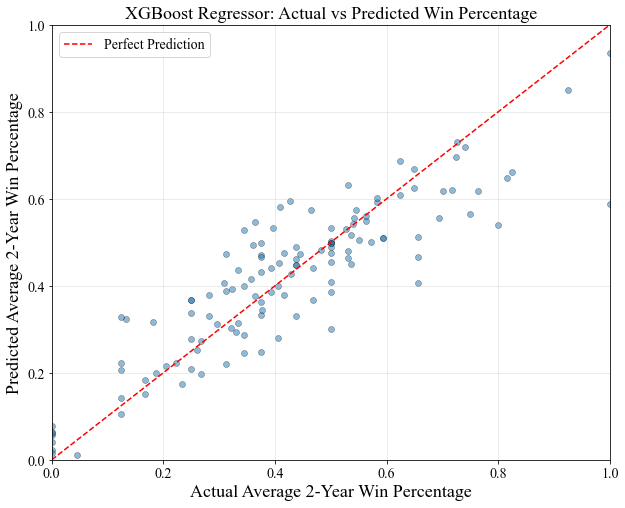

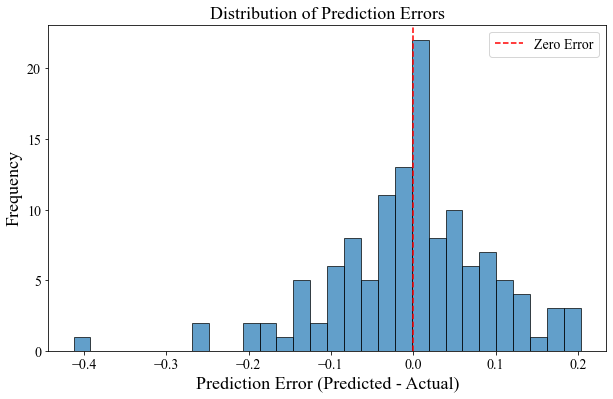

In [19]:
# Create scatter plot of actual vs predicted win percentages
plt.figure(figsize=(10, 8))
plt.scatter(y_test, plot_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Average 2-Year Win Percentage')
plt.ylabel('Predicted Average 2-Year Win Percentage')
plt.title('XGBoost Regressor: Actual vs Predicted Win Percentage')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Alternative visualization: prediction errors
plt.figure(figsize=(10, 6))
errors = plot_pred - y_test
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.legend()
plt.show()

In [20]:
print('Hold-out Test Set Performance:')
print('=' * 50)
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test, plot_pred))))
print('MAE:  {:.4f}'.format(mean_absolute_error(y_test, plot_pred)))
print('R²:   {:.4f}'.format(r2_score(y_test, plot_pred)))

Hold-out Test Set Performance:
RMSE: 0.0969
MAE:  0.0706
R²:   0.7861


The XGBoost Regressor shows promising performance in predicting the average 2-year winning percentage for NFL coaches. The model captures the relationship between the input features and coaching success as measured by win percentage.

In [21]:
# Load data for recent coach predictions
df_ = pd.read_csv('svd_imputed_master_data.csv', index_col=0)
#df_.fillna(0, inplace=True)
df_ = df_[df_['Coach Tenure Class'] == -1]
print(f"Number of recent coaches to predict: {df_.shape[0]}")
df_.head(10)

Number of recent coaches to predict: 21


,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Aaron Glenn,2025,53,0,0,0,0,5,4,0,...,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0,0.410947,-1
31,Ben Johnson,2025,39,0,1,0,0,4,3,0,...,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0,0.072086,-1
69,Brian Callahan,2024,40,0,0,0,0,3,5,0,...,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0,0.176471,-1
70,Brian Daboll,2022,47,0,0,1,0,10,8,0,...,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0,0.455882,-1
72,Brian Schottenheimer,2025,52,0,2,1,0,8,14,0,...,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0,0.255720,-1
133,Dan Quinn,2024,54,1,6,3,0,8,5,6,...,1.188696,-0.407393,0.337047,-0.828606,0.628450,-0.898061,0.866486,0.0,0.705882,-1
139,Dave Canales,2024,43,0,3,0,0,6,1,0,...,0.506368,-1.477273,-0.444299,-1.201064,-0.470088,-1.654772,-0.411087,0.0,0.294118,-1
145,DeMeco Ryans,2023,39,0,0,0,0,3,2,0,...,1.190423,-1.859089,1.562923,-1.609182,1.198335,0.756328,0.812410,0.0,0.588235,-1
320,Jim Harbaugh,2024,61,1,0,0,16,2,0,4,...,0.437967,0.316324,0.704380,-0.259284,1.062612,0.009139,-0.609940,1.0,0.647059,-1


In [22]:
X_ = df_.iloc[:,2:-2]
y_ = df_['Avg 2Y Win Pct']  # Get actual win percentages for comparison
X_.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,53,0,0,0,0,5,4,0,0.902133,0.363901,...,0.352941,-1.060228,-0.012856,-1.263665,-1.187244,-1.102638,-1.624895,0.092283,0.710263,0.0
31,39,0,1,0,0,4,3,0,1.649025,1.737787,...,0.352941,-0.594120,-0.097931,-0.883688,0.213985,-1.099407,0.889190,0.747721,-0.193002,0.0
69,40,0,0,0,0,3,5,0,-0.183835,-0.355235,...,0.382353,-1.061871,-0.164661,-1.308011,0.319058,-0.685212,-0.055987,-1.061439,-0.129255,0.0
70,47,0,0,1,0,10,8,0,-0.539089,-0.515554,...,0.305147,-1.745387,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0
72,52,0,2,1,0,8,14,0,0.143263,-0.183343,...,0.558824,0.722236,0.199980,0.415432,-0.201603,-0.065758,0.303106,0.400758,0.017944,1.0


In [23]:
# Train final model on FULL historical dataset for recent coach predictions
from xgboost import XGBRegressor

# Extract optimal parameters from cross-validation results
print("Extracting optimal parameters from coach-level cross-validation...")
print(f"Parameter selection based on {len(xgbr_best_params_dict['n_estimators'])} CV folds:")

# Calculate mode (most frequent value) for each parameter
cv_optimized_params = {}
for param_name, param_values in xgbr_best_params_dict.items():
    # Find the most common value across all folds
    mode_value = max(set(param_values), key=param_values.count)
    cv_optimized_params[param_name] = mode_value
    
    # Show parameter distribution across folds
    unique_values = list(set(param_values))
    value_counts = [(val, param_values.count(val)) for val in unique_values]
    value_counts.sort(key=lambda x: x[1], reverse=True)
    print(f"  {param_name}: {mode_value} (selected from {value_counts})")

# Add fixed regression parameters
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'reg:squarederror',
    'n_jobs':       1
}

cv_optimized_params.update(default_xgbr_params)
print("\nFinal model parameters (optimized from coach-level cross-validation):")
print(cv_optimized_params)

# IMPORTANT: Train on FULL historical dataset (X, y) for final predictions
# This uses all historical instances, not just the training split
print(f"\nTraining on FULL historical dataset: {X.shape[0]} coaches")
print(f"Recent hires to predict: {X_.shape[0]} coaches")

# Train the final model on all available historical data
xgbr_final = XGBRegressor(**cv_optimized_params).fit(X, y)
win_pct_predictions = xgbr_final.predict(X_)

print(f"\nPredictions complete for recent hires")
print(f"Win percentage range: {win_pct_predictions.min():.3f} - {win_pct_predictions.max():.3f}")
print(f"Average predicted win %: {win_pct_predictions.mean():.3f}")

print("\nNote: Model trained on entire historical dataset using coach-level CV-optimized parameters")

Extracting optimal parameters from coach-level cross-validation...
Parameter selection based on 5 CV folds:
  n_estimators: 200 (selected from [(200, 5)])
  learning_rate: 0.1 (selected from [(0.1, 4), (0.2, 1)])
  max_depth: 2 (selected from [(2, 4), (3, 1)])
  gamma: 0 (selected from [(0, 5)])
  reg_lambda: 0.01 (selected from [(0.01, 3), (0, 2)])
  reg_alpha: 0.01 (selected from [(0.01, 3), (0.1, 2)])
  subsample: 0.9 (selected from [(0.9, 2), (0.95, 2), (0.85, 1)])
  colsample_bytree: 0.85 (selected from [(0.85, 2), (0.9, 1), (0.8, 1), (0.95, 1)])
  min_child_weight: 3 (selected from [(3, 2), (1, 1), (4, 1), (5, 1)])

Final model parameters (optimized from coach-level cross-validation):
{'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 2, 'gamma': 0, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.85, 'min_child_weight': 3, 'verbosity': 1, 'objective': 'reg:squarederror', 'n_jobs': 1}

Training on FULL historical dataset: 635 coaches
Recent hir

In [24]:
# Display predictions for recent coaches (hired 2022 or later)
print("\n" + "="*80)
print("PREDICTED AVERAGE 2-YEAR WIN PERCENTAGES FOR RECENT COACHES")
print("="*80)
print("Model: XGBoost Regressor with coach-level cross-validation")
print(f"Training data: {X.shape[0]} historical coaches (full dataset)")
print(f"Features: {X.shape[1]} engineered features with SVD imputation")
print("="*80)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Coach Name': df_['Coach Name'].values,
    'Year': df_['Year'].values,
    'Actual Win %': y_.values,
    'Predicted Win %': win_pct_predictions
})

# Sort by predicted win percentage descending
results_df = results_df.sort_values('Predicted Win %', ascending=False)

# Filter for coaches hired 2022 or later
recent_coaches = results_df[results_df['Year'] >= 2022]

print(f"\nCoaches hired 2022 or later (sorted by predicted win %):\n")
print(f"{'Coach Name':<22} {'Year':>4}  {'Predicted':>9}  {'Actual':>8}  {'Difference':>10}")
print("-" * 65)

for idx, row in recent_coaches.iterrows():
    actual = row['Actual Win %']
    predicted = row['Predicted Win %']
    
    if actual > 0:
        actual_str = f"{actual:.3f}"
        diff = predicted - actual
        diff_str = f"{diff:+.3f}"
    else:
        actual_str = "TBD"
        diff_str = "TBD"
    
    print(f"{row['Coach Name']:<22} {int(row['Year']):>4}  {predicted:>9.3f}  {actual_str:>8}  {diff_str:>10}")

# Performance analysis for completed coaches
completed_coaches = recent_coaches[recent_coaches['Actual Win %'] > 0]
if len(completed_coaches) > 0:
    mae = mean_absolute_error(completed_coaches['Actual Win %'], completed_coaches['Predicted Win %'])
    rmse = np.sqrt(mean_squared_error(completed_coaches['Actual Win %'], completed_coaches['Predicted Win %']))
    r2 = r2_score(completed_coaches['Actual Win %'], completed_coaches['Predicted Win %'])
    
    print(f"\n" + "-"*80)
    print(f"PERFORMANCE ON COMPLETED RECENT HIRES:")
    print(f"  Coaches with 2+ years data: {len(completed_coaches)}")
    print(f"  Mean Absolute Error: {mae:.3f}")
    print(f"  Root Mean Square Error: {rmse:.3f}")
    print(f"  R² Score: {r2:.3f}")

# Overall statistics
print(f"\n" + "-"*80)
print(f"SUMMARY STATISTICS:")
print(f"  Average predicted win % for recent hires: {recent_coaches['Predicted Win %'].mean():.3f}")
print(f"  Std. dev. of predictions: {recent_coaches['Predicted Win %'].std():.3f}")
print(f"  Range: {recent_coaches['Predicted Win %'].min():.3f} - {recent_coaches['Predicted Win %'].max():.3f}")

print(f"\nModel Performance (Coach-Level Cross-Validation):")
print(f"  Average RMSE: {np.mean(xgbr_result_dict['test_rmse']):.4f}")
print(f"  Average R² Score: {np.mean(xgbr_result_dict['test_r2']):.4f}")
print(f"  Average MAE: {np.mean(xgbr_result_dict['test_mae']):.4f}")

print("\n" + "="*80)
print("METHODOLOGY NOTES:")
print("Coach-level train/test splitting prevents data leakage")
print("SVD matrix factorization handles missing historical statistics")
print("Features normalized relative to league averages by year")
print("Model trained on entirety of historical data for final predictions")
print("Hyperparameters optimized via coach-level cross-validation")
print("="*80)


PREDICTED AVERAGE 2-YEAR WIN PERCENTAGES FOR RECENT COACHES
Model: XGBoost Regressor with coach-level cross-validation
Training data: 635 historical coaches (full dataset)
Features: 150 engineered features with SVD imputation

Coaches hired 2022 or later (sorted by predicted win %):

Coach Name             Year  Predicted    Actual  Difference
-----------------------------------------------------------------
Dan Quinn              2024      0.597     0.706      -0.109
Shane Steichen         2023      0.532     0.500      +0.032
Todd Bowles            2022      0.526     0.500      +0.026
Mike Vrabel            2025      0.518     0.135      +0.383
Jim Harbaugh           2024      0.512     0.647      -0.135
Dave Canales           2024      0.497     0.294      +0.203
Sean Payton            2023      0.483     0.529      -0.046
DeMeco Ryans           2023      0.480     0.588      -0.108
Mike Macdonald         2024      0.475     0.588      -0.113
Kevin O'Connell        2022      0.471

## Baseline Model Comparison

To understand how well our XGBoost model performs, let's compare it against a simple baseline model that always predicts the mean win percentage from the training set. This gives us context for our model's predictive power.

MODEL PERFORMANCE COMPARISON

Training set mean win percentage: 0.4122
(Baseline always predicts this value)

----------------------------------------
BASELINE MODEL (Always Predict Mean):
----------------------------------------
RMSE: 0.2097
MAE:  0.1626
R²:   -0.0016

----------------------------------------
XGBOOST REGRESSOR MODEL:
----------------------------------------
RMSE: 0.0969
MAE:  0.0706
R²:   0.7861

----------------------------------------
IMPROVEMENT OVER BASELINE:
----------------------------------------
RMSE Reduction: 0.1128 (53.8% improvement)
MAE Reduction:  0.0920 (56.6% improvement)
R² Improvement: 0.7877 (from -0.0016 to 0.7861)


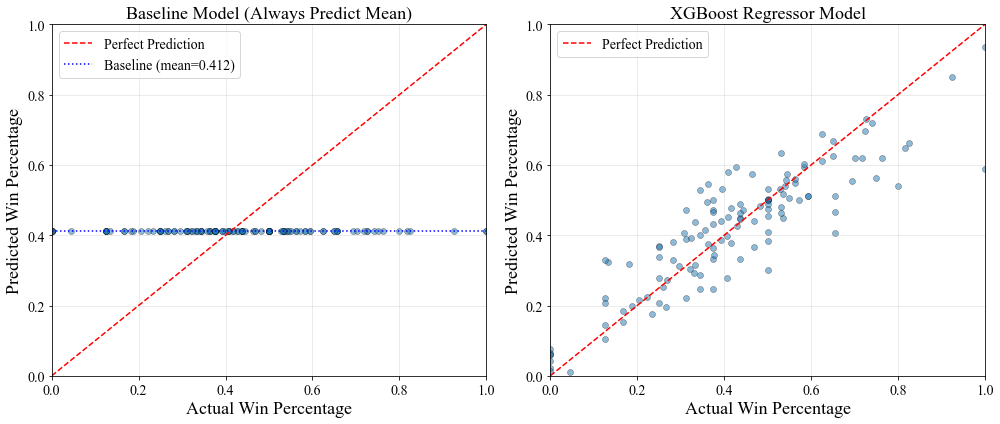

In [25]:
# Calculate baseline model performance (always predict mean)
train_mean = y_train.mean()
baseline_predictions = np.full(len(y_test), train_mean)

# Calculate baseline metrics
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

# Calculate our model's metrics for comparison
model_rmse = np.sqrt(mean_squared_error(y_test, plot_pred))
model_mae = mean_absolute_error(y_test, plot_pred)
model_r2 = r2_score(y_test, plot_pred)

# Display comparison
print("=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(f"\nTraining set mean win percentage: {train_mean:.4f}")
print(f"(Baseline always predicts this value)\n")

print("-" * 40)
print("BASELINE MODEL (Always Predict Mean):")
print("-" * 40)
print(f"RMSE: {baseline_rmse:.4f}")
print(f"MAE:  {baseline_mae:.4f}")
print(f"R²:   {baseline_r2:.4f}")

print("\n" + "-" * 40)
print("XGBOOST REGRESSOR MODEL:")
print("-" * 40)
print(f"RMSE: {model_rmse:.4f}")
print(f"MAE:  {model_mae:.4f}")
print(f"R²:   {model_r2:.4f}")

print("\n" + "-" * 40)
print("IMPROVEMENT OVER BASELINE:")
print("-" * 40)
print(f"RMSE Reduction: {baseline_rmse - model_rmse:.4f} ({(baseline_rmse - model_rmse)/baseline_rmse * 100:.1f}% improvement)")
print(f"MAE Reduction:  {baseline_mae - model_mae:.4f} ({(baseline_mae - model_mae)/baseline_mae * 100:.1f}% improvement)")
print(f"R² Improvement: {model_r2 - baseline_r2:.4f} (from {baseline_r2:.4f} to {model_r2:.4f})")

# Visualize baseline vs model predictions
plt.figure(figsize=(14, 6))

# Subplot 1: Baseline predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, baseline_predictions, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.axhline(y=train_mean, color='b', linestyle=':', label=f'Baseline (mean={train_mean:.3f})')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Baseline Model (Always Predict Mean)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: XGBoost predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, plot_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('XGBoost Regressor Model')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()